##Sunil_Kumar##
@k22sunil@gmail.com
"Nifty 50 Monthly Returns Heatmap: A 15-Year Analysis (2010–2025)"

In [2]:
pip install yfinance pandas seaborn matplotlib

[*********************100%***********************]  1 of 1 completed
<ipython-input-6-406335bdf418>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data[close_col].resample("M").last()


Available columns: MultiIndex([( 'Close', '^NSEI'),
            (  'High', '^NSEI'),
            (   'Low', '^NSEI'),
            (  'Open', '^NSEI'),
            ('Volume', '^NSEI')],
           names=['Price', 'Ticker'])


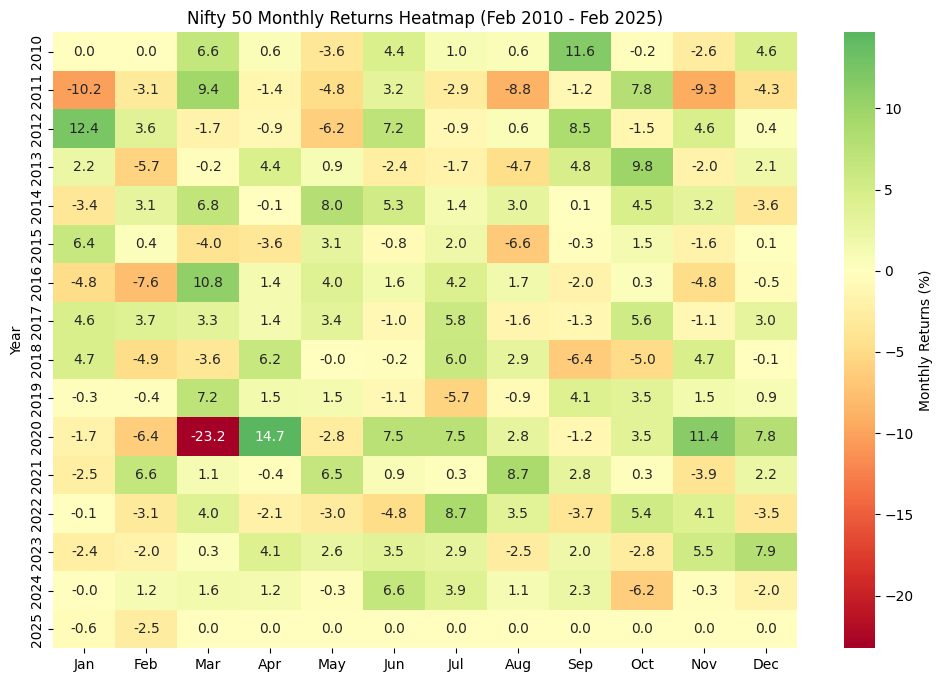

In [6]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ticker for Nifty 50
ticker = "^NSEI"

# Fetch data from Feb 2010 to Feb 2025
try:
    data = yf.download(ticker, start="2010-02-01", end="2025-02-21", progress=True)
    if data.empty:
        raise ValueError("No data returned. Check ticker or internet connection.")
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

# Inspect the columns
print("Available columns:", data.columns)

# Handle MultiIndex: Extract 'Close' column
# If MultiIndex, access 'Close' with tuple ('Close', '^NSEI'), otherwise just 'Close'
if isinstance(data.columns, pd.MultiIndex):
    close_col = ('Close', '^NSEI') if ('Close', '^NSEI') in data.columns else 'Close'
else:
    close_col = 'Close'

# Check if the column exists
if close_col not in data.columns:
    print(f"Error: '{close_col}' column not found. Available columns:", data.columns)
    exit()

# Resample to monthly data and calculate returns
monthly = data[close_col].resample("M").last()
returns = monthly.pct_change() * 100

# Create a pivot table for the heatmap
returns_df = pd.DataFrame({
    "Year": returns.index.year,
    "Month": returns.index.month,
    "Returns": returns
})
pivot = returns_df.pivot_table(values="Returns", index="Year", columns="Month", fill_value=0)

# Rename columns to month names
pivot.columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="RdYlGn", center=0, cbar_kws={'label': 'Monthly Returns (%)'})
plt.title("Nifty 50 Monthly Returns Heatmap (Feb 2010 - Feb 2025)")
plt.show()